In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [367]:
data = pd.read_csv('/home/zorro/VM/BigData/netology-big-data-master/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [375]:
import math
for cn in regr_data.columns:        
    for i in regr_data[cn]:
        if math.isnan(i):                
            print(cn)


In [368]:
#Убираем Null в числовых полях
import math
def del_null(dfw):
    for cn in dfw.columns:    
        new_vals = {cn:[]}
        for i in dfw[cn]:
            if math.isnan(i):                
                new_vals[cn].append(0)
            else:    
                new_vals[cn].append(int(round(i)))
        del data[cn]        
        data[cn] = pd.DataFrame(new_vals[cn])  
dfl64 = data.select_dtypes(include=['float64'])
del_null(dfl64)
      


In [370]:
# функции для трансформации столбцов
def transform_col(cols, col):
    new_columns=dict.fromkeys(cols,[])     
    z = 0
    for cnm in cols:
        ls=[]
        for val in col:
            if val == cnm:
                ls.append(1)
            else:
                ls.append(0)
        new_columns[cnm] = ls   
    return new_columns

def add_pars(col_name):
    cc = data[col_name].unique()
    nc = transform_col(cc,data[col_name])
    for cnm in cc:
        new_f = col_name+'_'+cnm
        data[new_f] = np.array(nc[cnm])


In [371]:
#трансформация текстовых полей и удаление ненужных столбцов
#data = pd.read_csv('/home/zorro/VM/BigData/netology-big-data-master/train.csv')
del data['Alley']
del data['PoolQC']
del data['Fence']
del data['MiscFeature']
del data['MasVnrType']

transform_columns = ['Exterior2nd','Exterior1st','RoofMatl','RoofStyle','HouseStyle','BldgType','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','MSZoning','Street','LotShape','LandContour','Utilities','SaleType','SaleCondition']
for ii in transform_columns:
    try:
        add_pars(ii)
        del data[ii]
    except Exception as exception:
        print(ii)
        print(exception)
        

In [372]:
#предсказываемое поле
#data = pd.read_csv('/home/zorro/VM/BigData/netology-big-data-master/train.csv')
regr_data = data.select_dtypes(exclude=['object'])
#regr_data = regr_data.select_dtypes(exclude=['float64'])
y = data['SalePrice']
del regr_data['SalePrice']
del regr_data['Id']
del regr_data['YrSold']



In [376]:
#Разделяем данные
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(regr_data, y, test_size=1/3, random_state = 0)
#считаем регрессию
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain, Ytrain)
predictions = lm.predict(Xtest)
print("Коэффициенты корреляции","=",lm.coef_)
print("Независимый","=",lm.intercept_)
print("Оценка модели","=",lm.score(Xtrain, Ytrain)) 

Коэффициент корреляции = [-7.21380504e+00  7.99028855e-01  1.00699330e+04  5.69512053e+03
  3.86458441e+02  4.64263977e+01  1.52373985e+01  3.79691949e+00
 -1.77857625e+00  1.72557316e+01  7.75879763e+00  2.53870917e+01
  8.86640613e+00  4.20123662e+01  4.17660355e+03  5.84182945e+03
  2.46548568e+03  2.68741150e+03 -7.77288069e+03 -1.21672322e+04
  2.78267471e+03  2.77884345e+03 -1.09388835e+03  3.39560147e+01
  1.97123092e+01  3.49765046e+01  1.05201524e+01  2.42589095e+01
  2.78213542e+01  2.33576403e+01  2.96392299e-01 -7.05153685e+02
  3.64780576e-01  3.23267258e+01 -7.74666179e+00  2.37458338e+03
 -8.07710763e+03 -1.22083505e+04 -7.37112247e+03 -6.14979700e+03
 -2.29182853e+03  5.62371283e+04 -8.41770890e+03 -8.09968578e+03
  1.51925551e+03  1.80858070e+03  6.10285831e+03 -2.48837750e-09
  6.08413081e+03 -2.81046552e+04  6.59371905e+03  7.46533048e+02
  1.11914202e+04  2.64865398e+03  5.97037716e+03  1.97839848e+04
  1.28551447e+04 -3.83787009e+04  1.26021666e+03  5.19534888e+03


In [392]:
#!pip install googletrans
# функция переводчик
import re
from googletrans import Translator
def ftranslator(vstr):
    translator = Translator()
    spl = re.findall('[A-Z][a-z]*', vstr)
    f_n = " ".join(spl)
    translated = translator.translate(f_n, src='en', dest='ru')
    return translated.text
    

In [393]:
for fields in regr_data.columns:
    print(fields,' - ',ftranslator(fields))

MSSubClass  -  M S Подкласс
LotArea  -  Площадь участка
OverallQual  -  Общий Qual
OverallCond  -  Общий конд
YearBuilt  -  Год постройки
YearRemodAdd  -  Год Ремод Добавить
BsmtFinSF1  -  Bsmt Fin S F
BsmtFinSF2  -  Bsmt Fin S F
BsmtUnfSF  -  Bsmt Unf S F
TotalBsmtSF  -  Всего Bsmt S F
1stFlrSF  -  Flr S F
2ndFlrSF  -  Flr S F
LowQualFinSF  -  Low Qual Fin S F
GrLivArea  -  Gr Liv Area
BsmtFullBath  -  Bsmt Full Bath
BsmtHalfBath  -  Bsmt Half Bath
FullBath  -  Полная ванна
HalfBath  -  Half Bath
BedroomAbvGr  -  Спальня Abv Gr
KitchenAbvGr  -  Кухня Abv Gr
TotRmsAbvGrd  -  Tot Rms Abv Grd
Fireplaces  -  Камины
GarageCars  -  Гаражные машины
GarageArea  -  Гараж
WoodDeckSF  -  Деревянная палуба S F
OpenPorchSF  -  Открытое крыльцо S F
EnclosedPorch  -  Закрытое крыльцо
3SsnPorch  -  Ssn Porch
ScreenPorch  -  Экран крыльцо
PoolArea  -  Бассейн
MiscVal  -  Разное Вал
MoSold  -  Мо Продано
LotFrontage  -  Лот Фронтаж
MasVnrArea  -  Мас Внр Площадь
GarageYrBlt  -  Garage Yr Blt
Exterior2n

KeyboardInterrupt: 

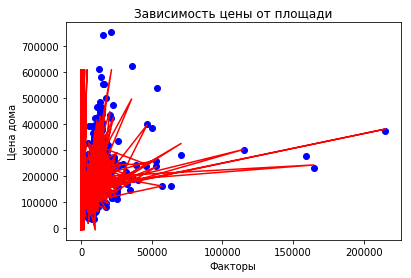

In [377]:
plt.scatter(data.LotArea,data.SalePrice, color = 'blue')
plt.plot(Xtrain, lm.predict(Xtrain), color = 'red')
plt.title('Зависимость цены от площади')
plt.xlabel('Факторы')
plt.ylabel("Цена дома")
plt.show()

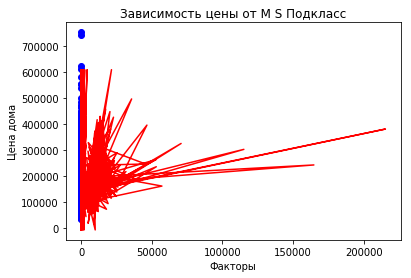

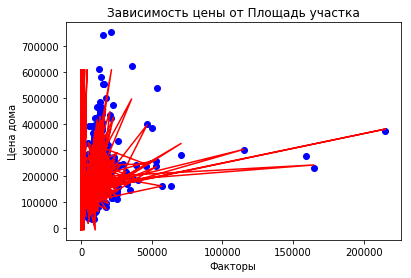

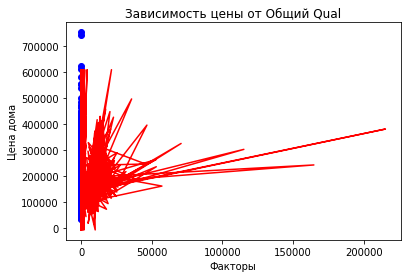

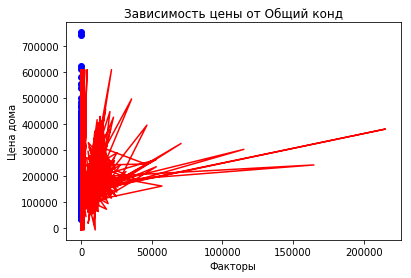

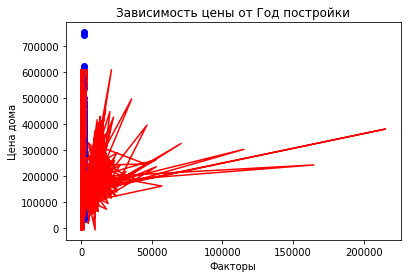

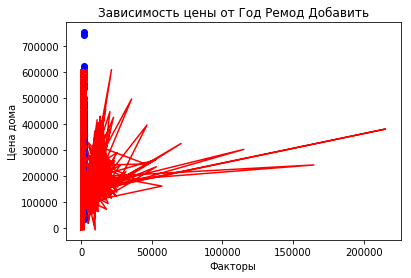

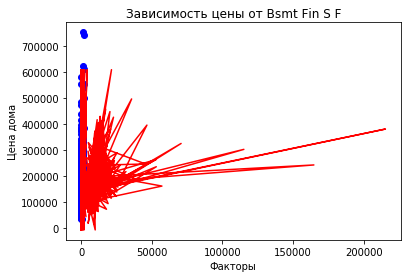

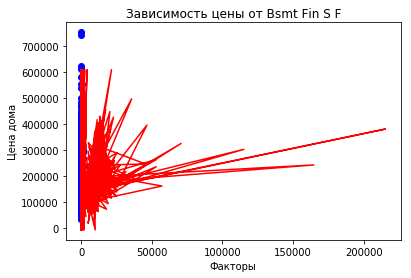

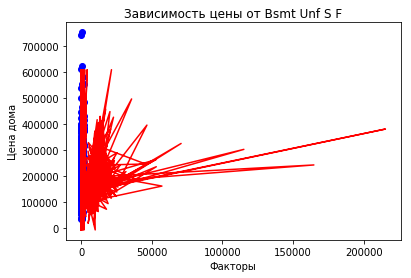

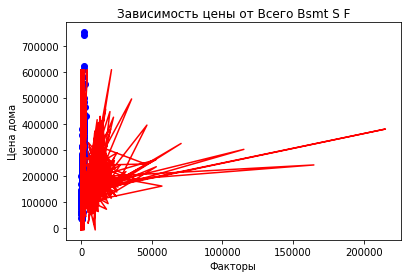

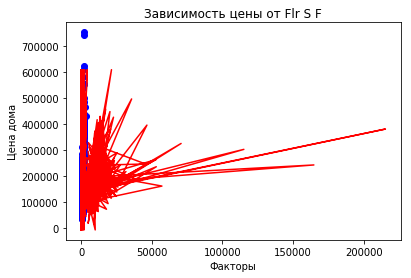

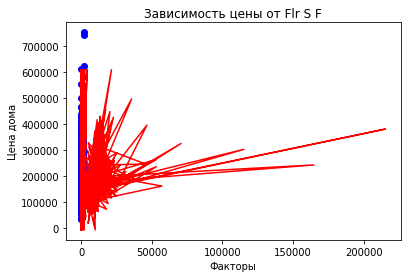

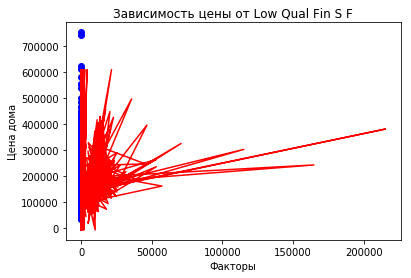

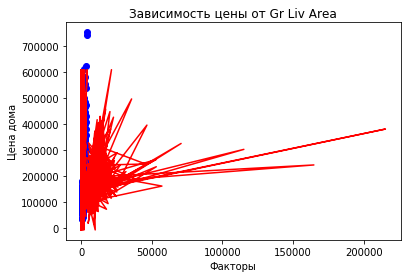

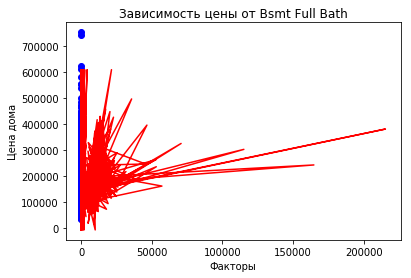

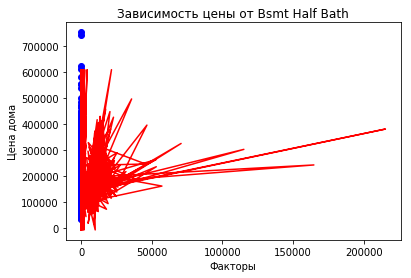

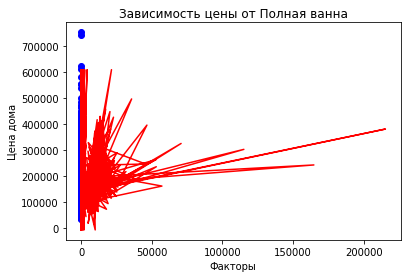

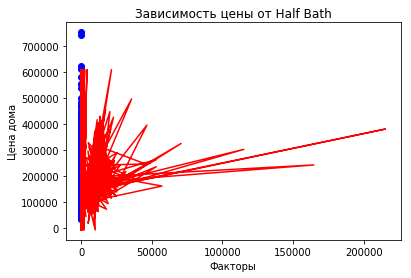

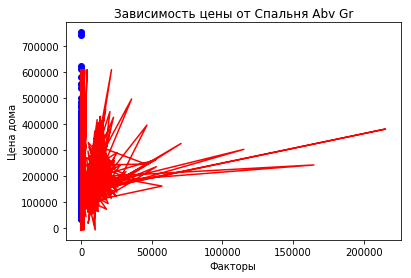

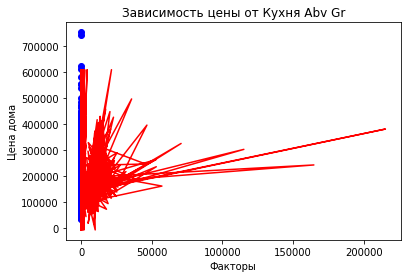

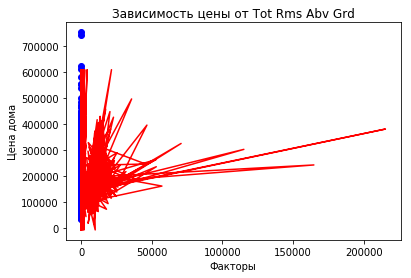

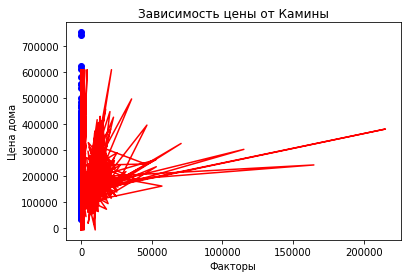

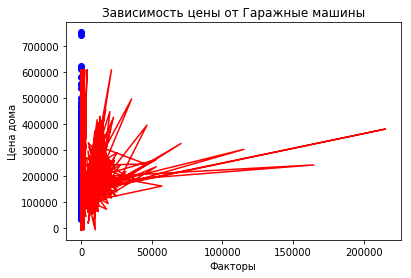

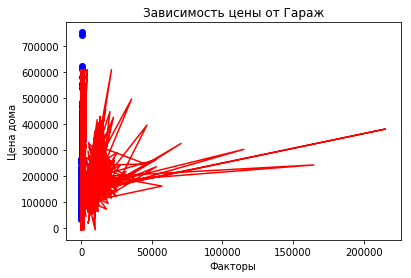

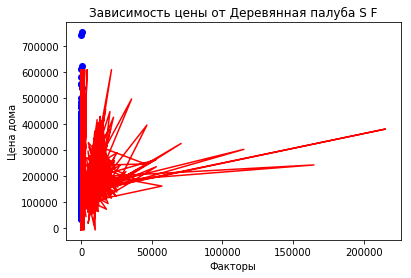

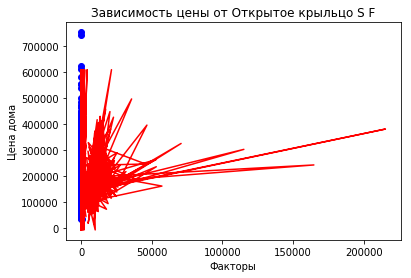

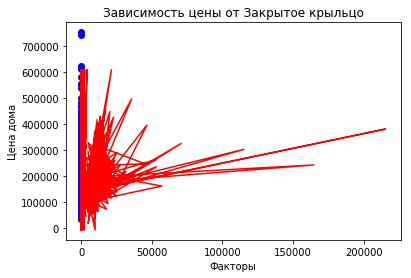

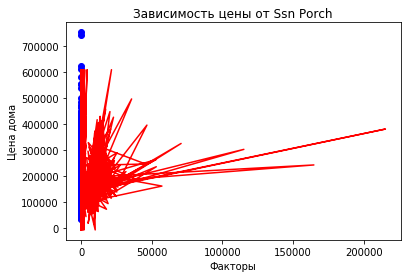

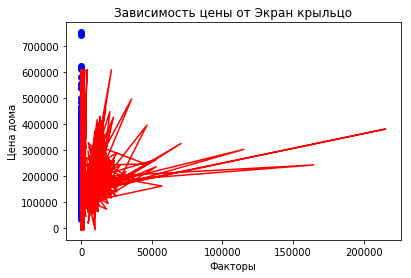

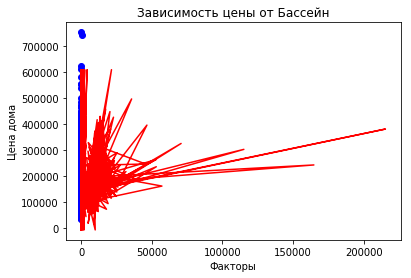

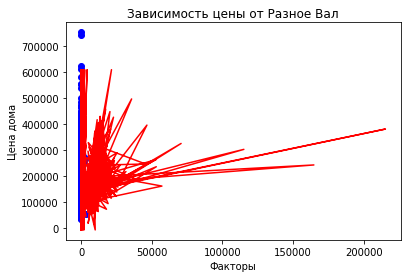

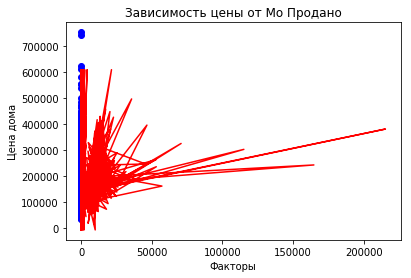

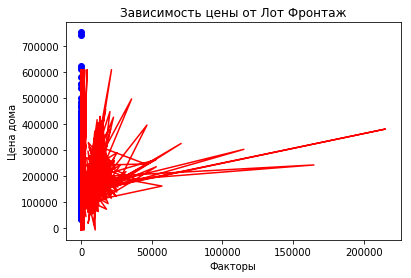

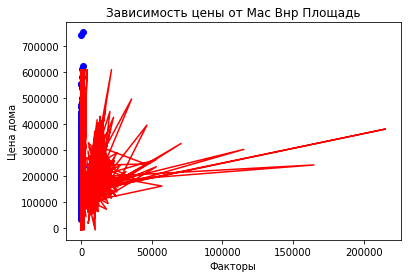

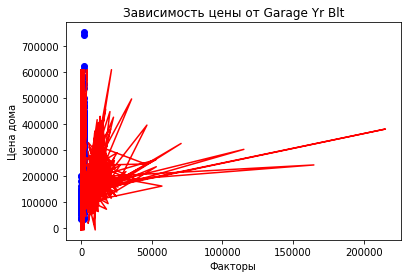

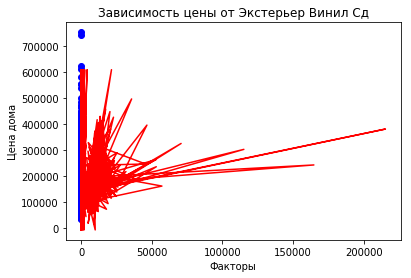

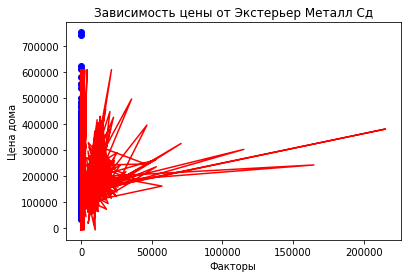

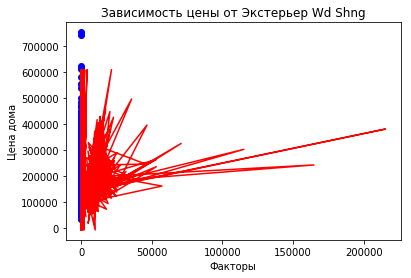

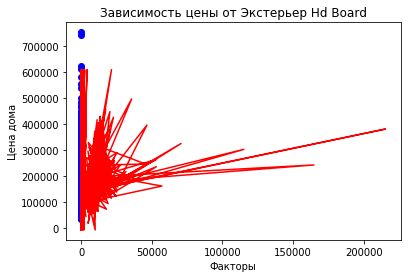

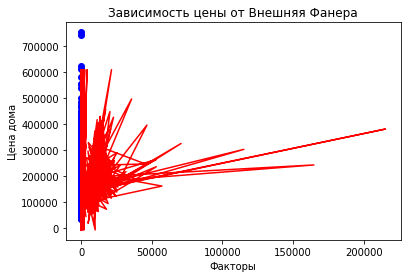

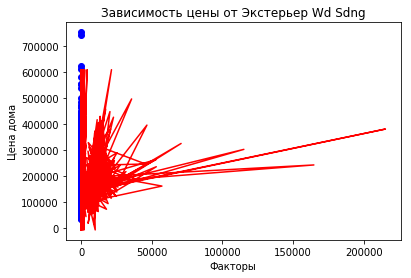

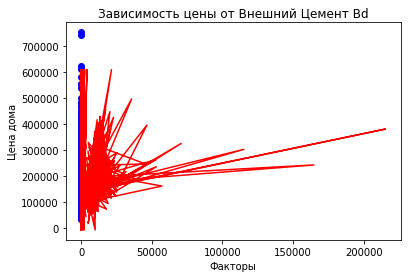

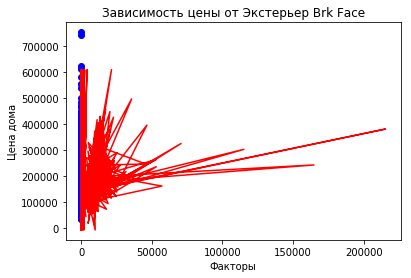

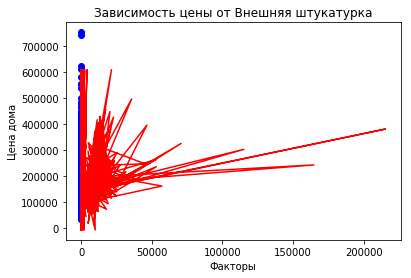

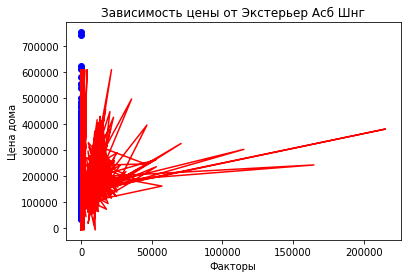

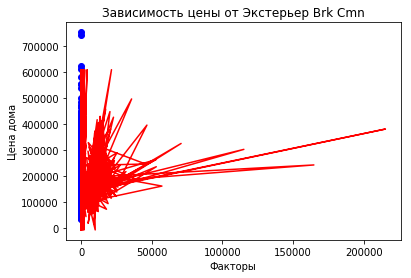

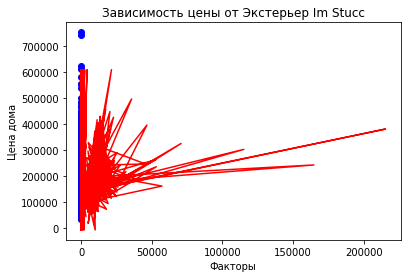

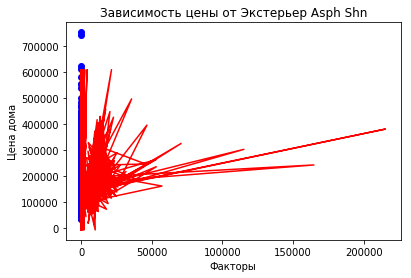

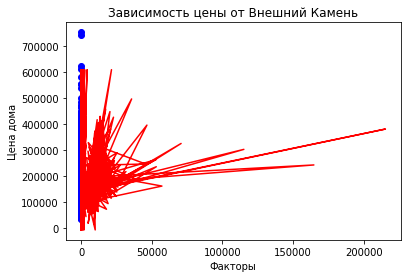

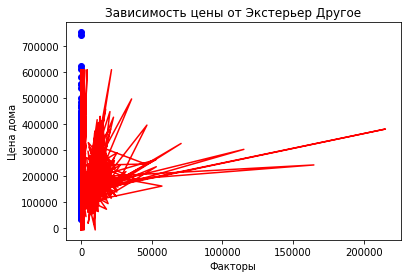

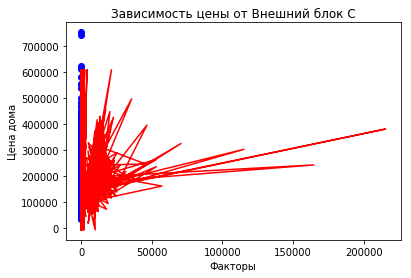

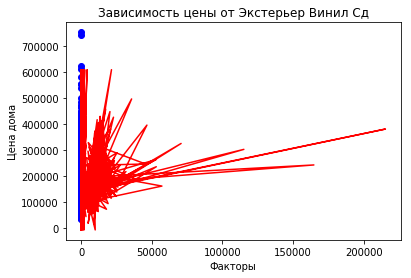

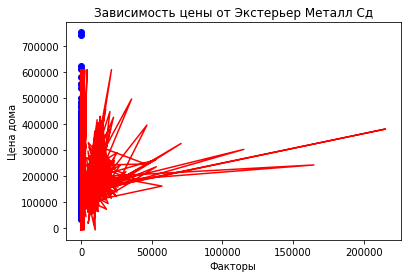

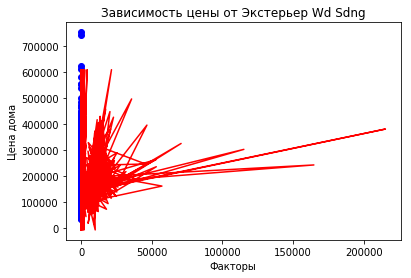

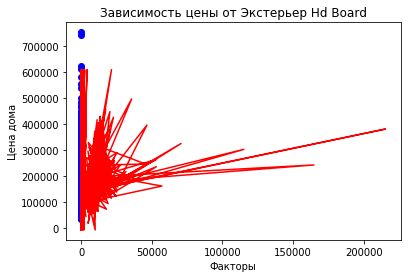

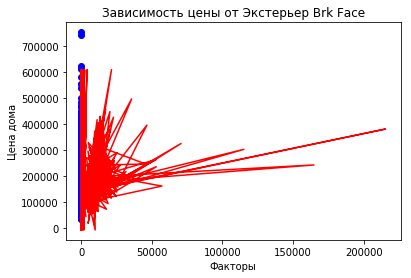

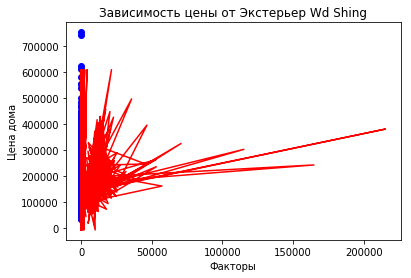

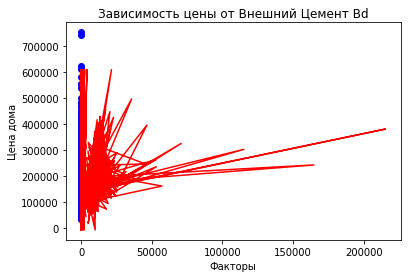

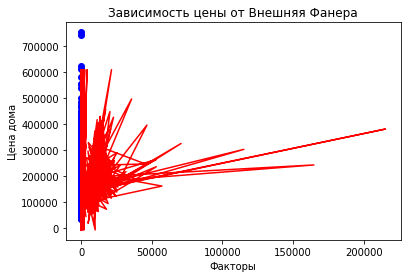

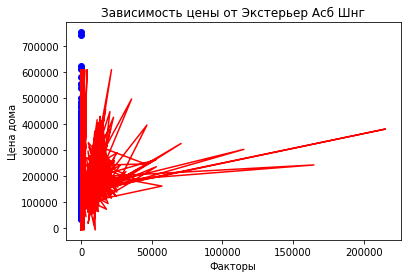

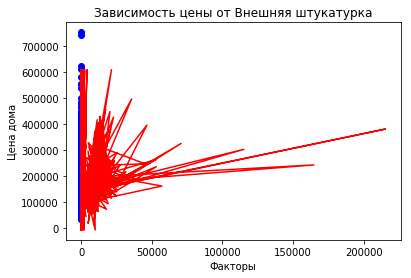

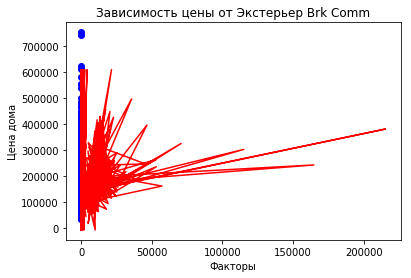

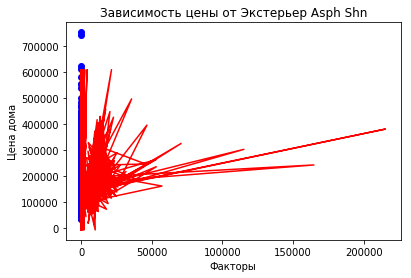

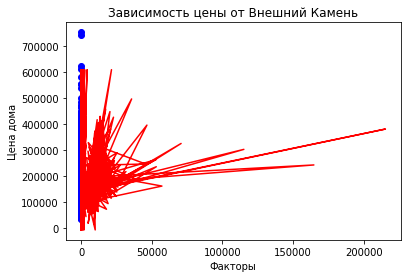

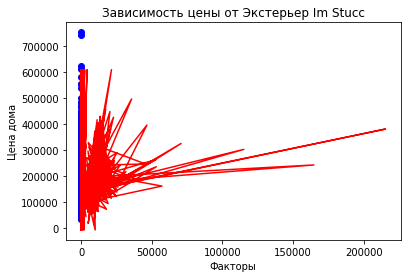

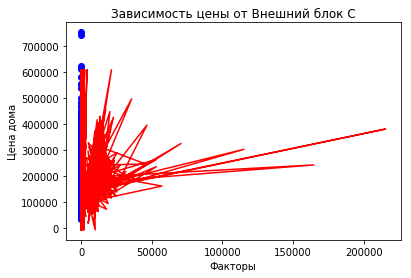

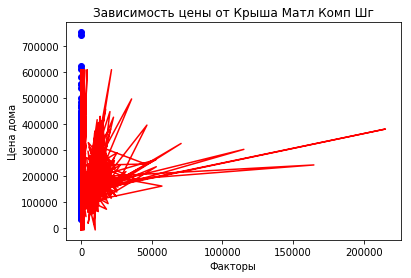

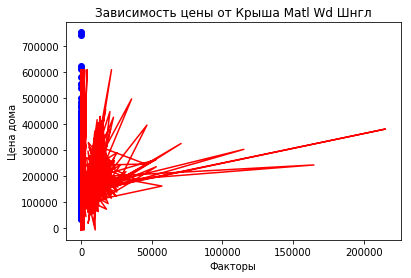

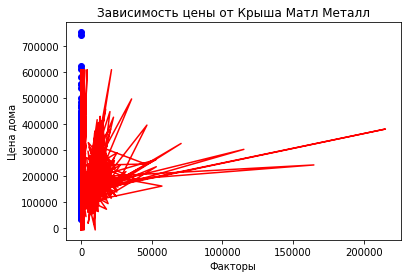

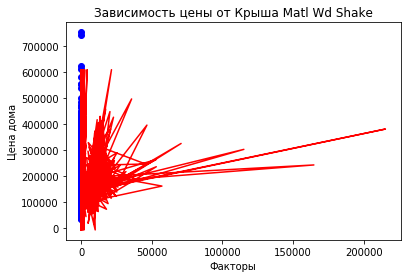

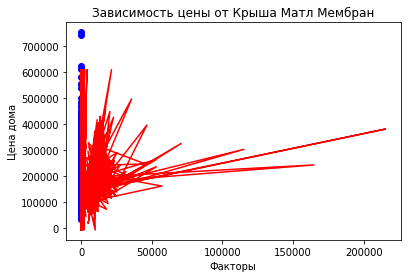

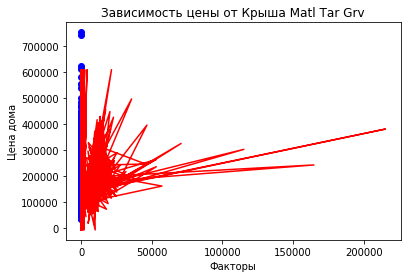

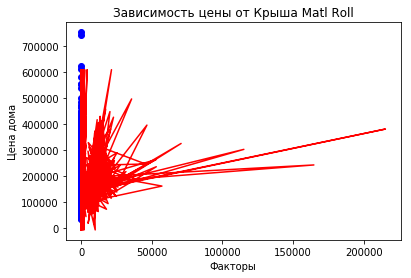

KeyboardInterrupt: 

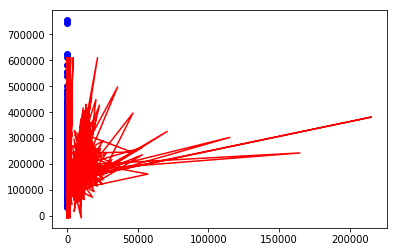

In [394]:
#Зависимости от всего подряд - работает долго (проверь комп.)
for ii in regr_data.columns:
    plt.scatter(regr_data[ii],data.SalePrice, color = 'blue')
    plt.plot(Xtrain, lm.predict(Xtrain), color = 'red')
    plt.title(' Цена от '+ftranslator(ii))
    plt.xlabel('Факторы')
    plt.ylabel("Цена дома")
    plt.show()